<a href="https://datamics.com/de/courses/"><img src=../../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# K Nearest Neighbors Projekt - Lösung

Willkommen zum KNN Projekt! Dies wird ein einfaches Prjekt werden, das der Lektion ähnlich ist. Der Unterschied besteht darin, dass wir einen neuen Datensatz verwenden. Schau dir die Aufgabenstellung an und schreibe den Code in die Zellen.

## Libraries importieren

**Importiere Pandas, Seaborn und die üblichen Libraries.**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten

**Lese die CSV-Datei "KNN_Project_Data" in einen DataFrame ein.**

In [23]:
df = pd.read_csv('KNN_Project_Data')

**Checke den Head es DataFrame.**

In [24]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

## EDA

Da die Daten künstlich erzeugt wurden nutzen wir nur ein großes Pairplot mit Seaborn. 

**Nutze Seaborn um ein Pairplot für den DataFrame zu erstellen. Für Hue verwenden wir die Zielgruppe (en. target class).**

C:\Users\-T-\Anaconda3\envs\python-ml-kurs-anaconda-yml\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\-T-\Anaconda3\envs\python-ml-kurs-anaconda-yml\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


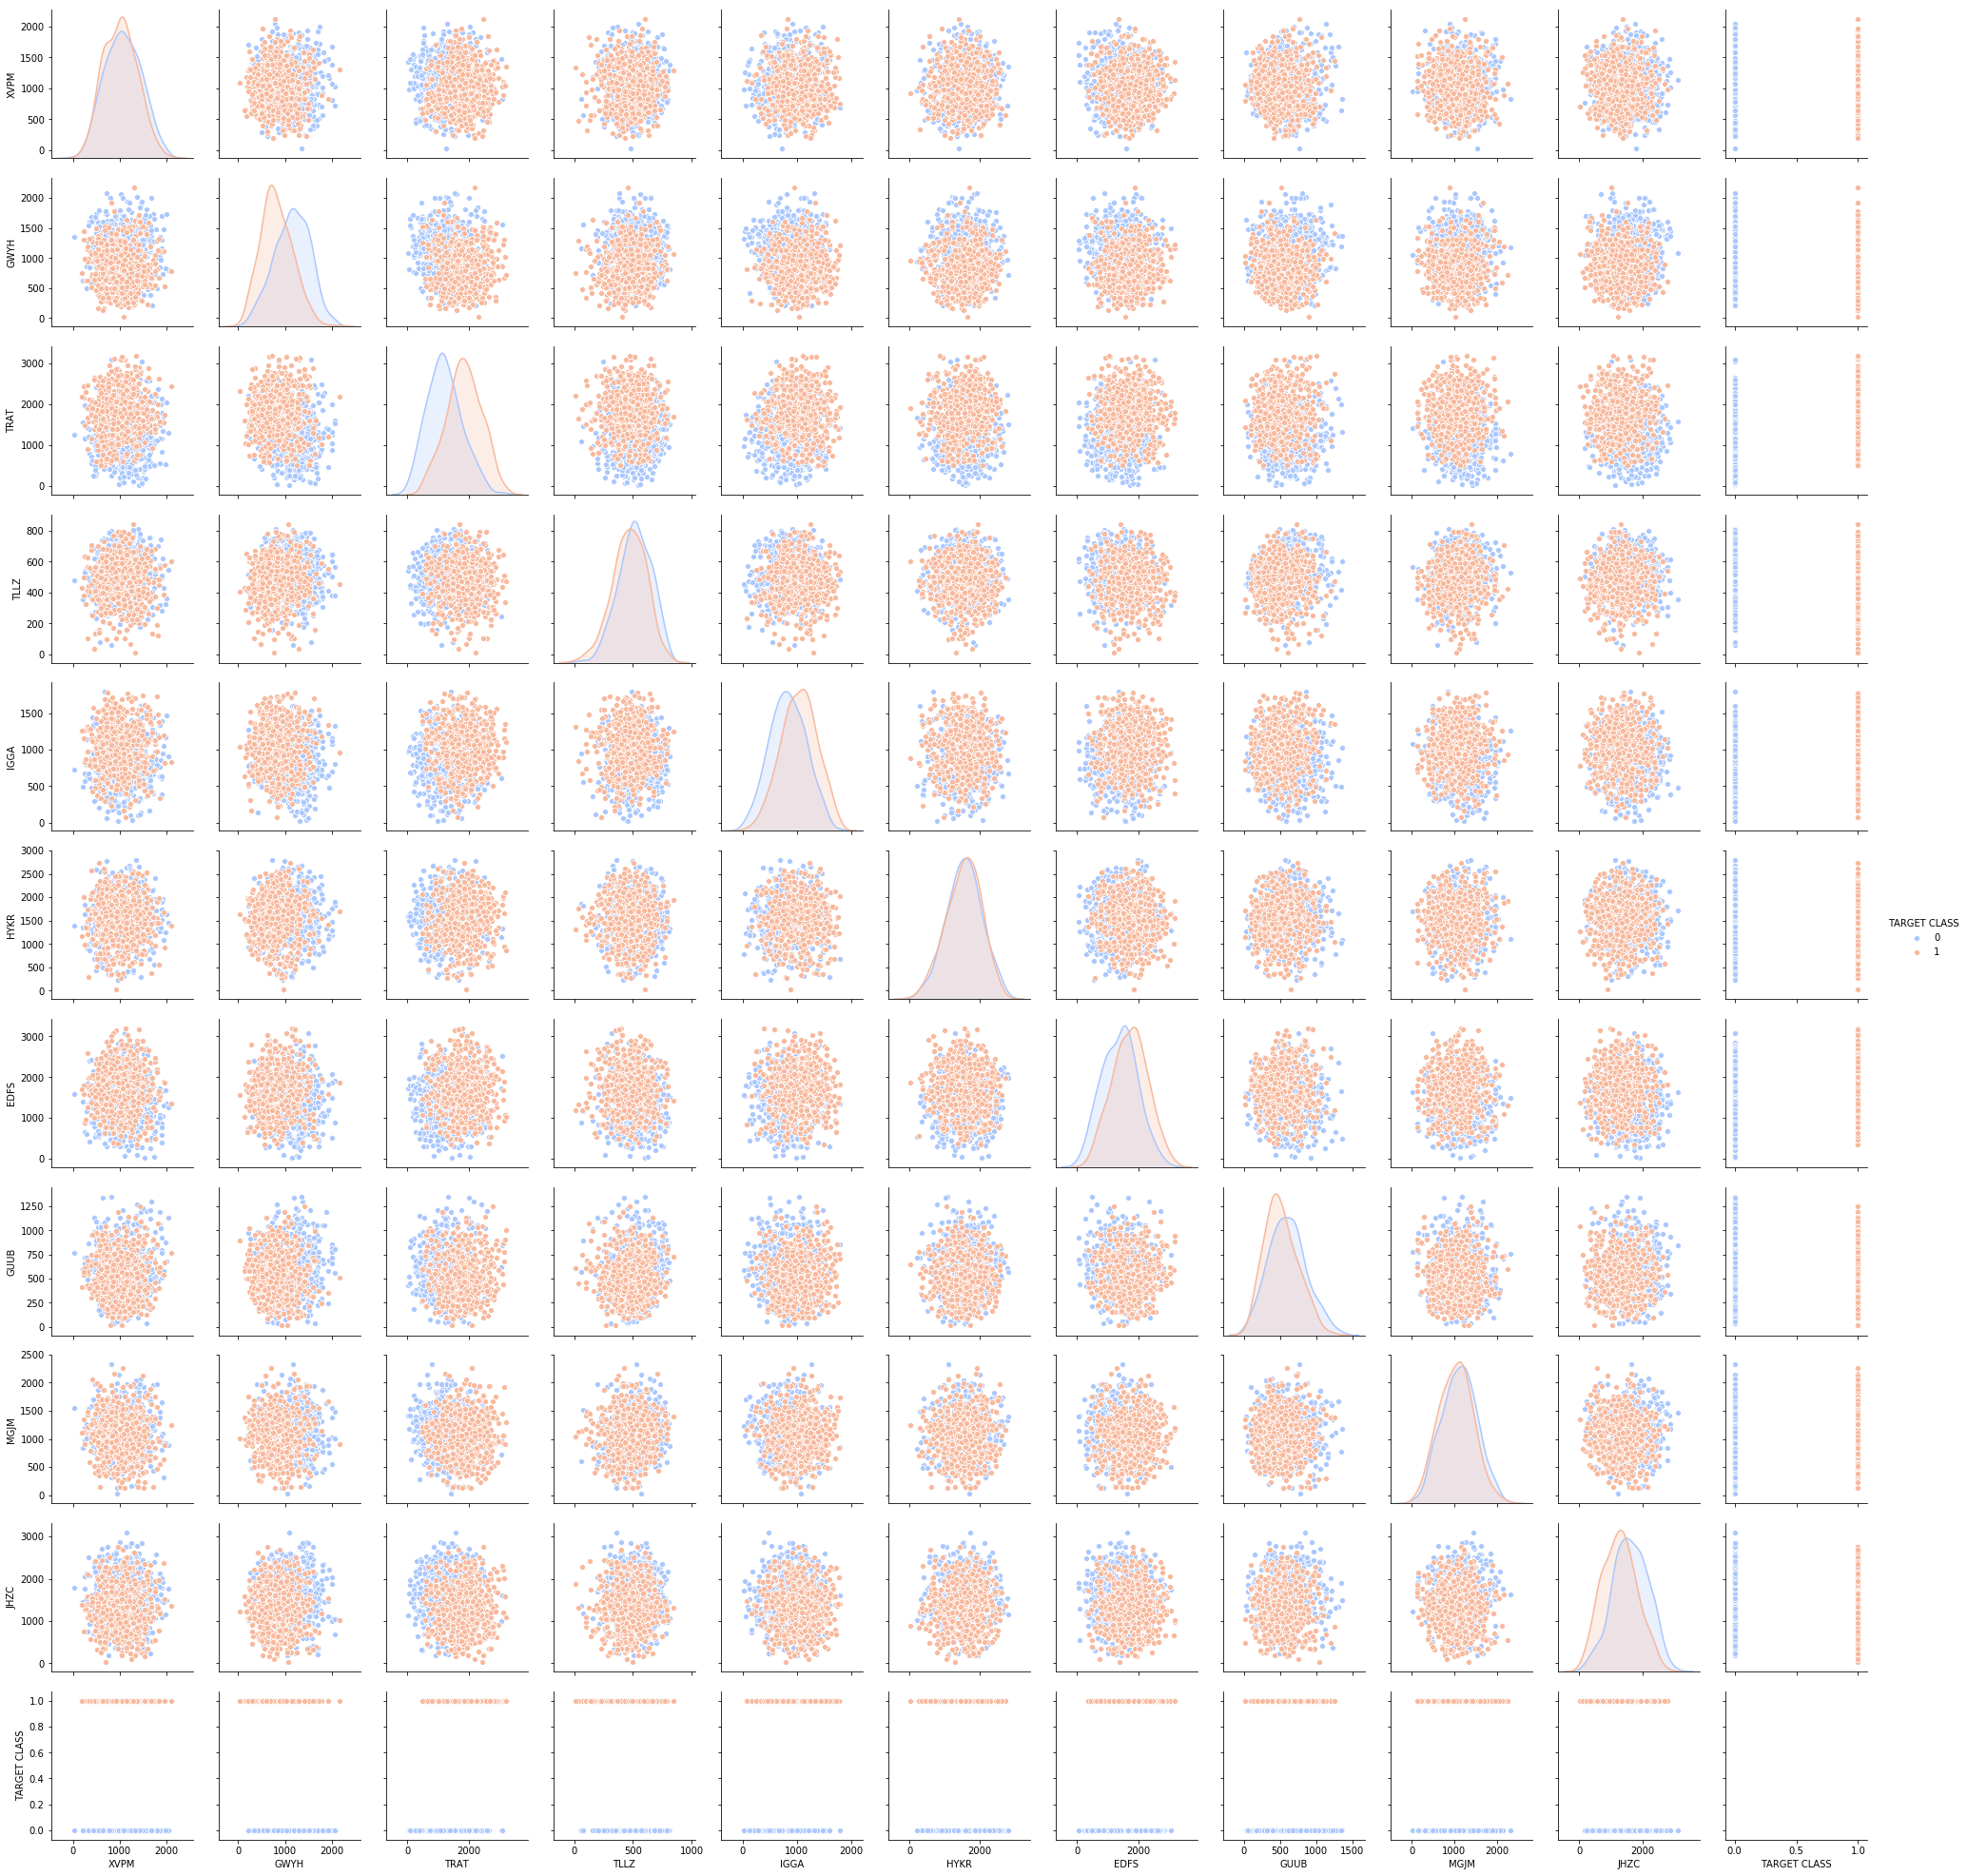

In [25]:
# Das wird ein wirklich großes Plot
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

## Variablen standardisieren
**Importiere StandardScaler von SciKit Learn.**

In [26]:
from sklearn.preprocessing import StandardScaler

**Erstelle ein StandardScaler() Objekt namens "scaler".**

In [27]:
scaler = StandardScaler()

**Wende den Scaler auf die Eigenschaften an.**

In [28]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Nutze .transform(), um die Eigenschaften in eine skalierte Version umzuwandeln.**

In [29]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Konvertiere die skalierten Eigenschaften in einen DataFrame und sieh dir dessen Head an.**

In [30]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

## Train Test Split

**Nutze train_test_split um die Daten in Trainings- und Testset aufzuteilen.**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## KNN anwenden

**Importiere KNeighborsClassifier aus SciKit Learn.**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

**Erstelle ein KNN Modell mit n_neighbors=1.**

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fitte dieses Modell zum Trainingsset.**

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## Vorghersagen und Auswertung

Lasst uns nun unser Modell auswerten!

**Nutze die predict Methode um die Werte unter Verwendung deines KNN Modells für X_test vorherzusagen.**

In [36]:
pred = knn.predict(X_test)

**Erstelle eine Confusion Matrix und den Classification Report.**

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))

[[117  40]
 [ 39 104]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       157
           1       0.72      0.73      0.72       143

   micro avg       0.74      0.74      0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



## Den K Wert wählen

Schreite damit fort die Elbow-Methode zu verwenden um einen guten K Wert zu wählen!

**Erstelle eine for-Schleife, die verschiedene KNN Modelle mit verschiedenen K Werten trainiert. Dann notiere die die Error Rate für jedes dieser Modelle in einer Liste.**

*Hinweis: Greife auf die Lektion zurück, falls dich dieser Schritt verwirrt.*

In [40]:
error_rate = []

# Könnte etwas Zeit in Anspruch nehmen
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Erstelle nun das folgende Diagramm mit den Infos aus deiner Schleife.**

Text(0, 0.5, 'Error Rate')

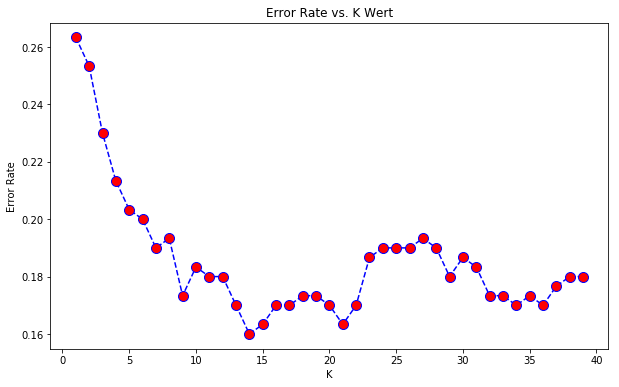

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Wert')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Erneut trainieren mit neuem K Wert

**Trainiere dein Modell erneut mit einem K Wert deiner Wahl. Erstelle dann erneut Classification Report und Confusion Matrix.**

In [42]:
# Mit K=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Mit K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Mit K=24


[[124  33]
 [ 24 119]]


              precision    recall  f1-score   support

           0       0.84      0.79      0.81       157
           1       0.78      0.83      0.81       143

   micro avg       0.81      0.81      0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



# Gut gemacht!